Generate Random Geographic Coordinates and a List of Cities

### Overall Analysis

Random cities longitude and latitude were collected to analyze the correlation between latitude and weather patterns. Climate changes differ from each other in the areas with different latitudes. Temperatures are typically warmer near the Equator and cooler near the poles.

Humidity decreases generally closer to the equator. Winds are generally lower near the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import datetime as datetime
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 645


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Setting the URL as an fstring in loop.
#url = f'https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}''
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric')
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        #time.sleep(1)
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        print(city_url)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | nago
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | abu dhabi
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | scottsburgh
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=scottsburgh&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 9 of Set 1 | farnham
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | ambatondrazaka
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=attawapiskat&appid=a626b7a56ba247111d8206a91e0681fd&

Processing Record 16 of Set 4 | qaqortoq
Processing Record 17 of Set 4 | hervey bay
Processing Record 18 of Set 4 | port blair
Processing Record 19 of Set 4 | avarua
Processing Record 20 of Set 4 | torbay
Processing Record 21 of Set 4 | ruatoria
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=ruatoria&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 22 of Set 4 | hobart
Processing Record 23 of Set 4 | volklingen
Processing Record 24 of Set 4 | grand river south east
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=grand river south east&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 25 of Set 4 | porto novo
Processing Record 26 of Set 4 | kyabram
Processing Record 27 of Set 4 | hilo
Processing Record 28 of Set 4 | pesqueira
Processing Record 29 of Set 4 | chernyshevskiy
Processing Record 30 of Set 4 | gondanglegi
Processing Record 31 of Set 4 | datong
Processing Record 32 of Set 4 | b

Processing Record 15 of Set 7 | saldanha
Processing Record 16 of Set 7 | skagastrond
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=skagastrond&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 17 of Set 7 | prado
Processing Record 18 of Set 7 | yaan
Processing Record 19 of Set 7 | gayeri
Processing Record 20 of Set 7 | samalaeulu
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=samalaeulu&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 21 of Set 7 | ballina
Processing Record 22 of Set 7 | pareora
Processing Record 23 of Set 7 | jining
Processing Record 24 of Set 7 | birin
Processing Record 25 of Set 7 | aykhal
Processing Record 26 of Set 7 | vestmannaeyjar
Processing Record 27 of Set 7 | westport
Processing Record 28 of Set 7 | lavrentiya
Processing Record 29 of Set 7 | montemor-o-novo
Processing Record 30 of Set 7 | goderich
Processing Record 31 of Set 7 | pevek
Processing Record 32 

Processing Record 21 of Set 10 | calvinia
Processing Record 22 of Set 10 | vila velha
Processing Record 23 of Set 10 | manta
Processing Record 24 of Set 10 | lodja
Processing Record 25 of Set 10 | kattivakkam
Processing Record 26 of Set 10 | sitka
Processing Record 27 of Set 10 | pandamatenga
Processing Record 28 of Set 10 | amuntai
Processing Record 29 of Set 10 | chapais
Processing Record 30 of Set 10 | mogok
Processing Record 31 of Set 10 | kochi
Processing Record 32 of Set 10 | nizhneyansk
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 33 of Set 10 | charters towers
Processing Record 34 of Set 10 | morant bay
Processing Record 35 of Set 10 | huanren
Processing Record 36 of Set 10 | roald
Processing Record 37 of Set 10 | glendive
Processing Record 38 of Set 10 | doka
Processing Record 39 of Set 10 | los llanos de aridane
Processing Record 40 of Set 10 | ulaangom
Processin

Processing Record 37 of Set 13 | truckee
Processing Record 38 of Set 13 | pahrump
Processing Record 39 of Set 13 | auki
Processing Record 40 of Set 13 | kot kapura
Processing Record 41 of Set 13 | aswan
Processing Record 42 of Set 13 | sao jose de ribamar
Processing Record 43 of Set 13 | nicolas bravo
Processing Record 44 of Set 13 | concepcion de buenos aires
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0     touros  -5.1989  -35.4608     28.04        64          44        7.03   
1       nago  26.5881  127.9761      9.24        63           0        0.97   
2     barrow  71.2906 -156.7887    -20.99        77         100       10.80   
3     faanui -16.4833 -151.7500     27.12        75          96        6.48   
4  abu dhabi  24.4667   54.3667     18.06        81           0        1.54   

  Country        Date  
0      BR  1675109277  
1      JP  1675109136  
2      US  1675109278  
3      PF  1675109278  
4      AE  1675109212

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# BONUS Export the City_Data into a csv
bonus_city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                 
0          mataura -46.1927  168.8643     14.62        80         100   
1        bonavista  48.6499  -53.1147      1.15        98         100   
2        mamedkala  42.1677   48.1199      1.59        80          49   
3        mahebourg -20.4081   57.7000     26.25        78          75   
4         calabozo   8.9242  -67.4293     35.81        25           9   

         Wind Speed Country        Date  
City_ID                                  
0              2.31      NZ  1673898360  
1             10.73      CA  1673898361  
2              2.43      RU  1673898362  
3              5.14      MU  1673898363  
4              2.02      VE  1673898364

In [11]:
#Convert the unix time into a readable datetime to use in titles.
year = pd.to_datetime(city_data_df['Date'],unit='s').dt.date[0]
print(year)

2023-01-30


### Create the Scatter Plots Requested
Create a scatter plot to showcase the relationship between Latitude vs. Temperature

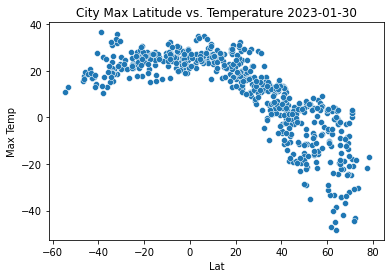

In [14]:
# Build scatter plot for latitude vs. temperature
lat_plot = sns.scatterplot(data=city_data_df, x='Lat', y='Max Temp')
#latplot = plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#{city_data_df["Date"]}

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature {year}') #add on date to title
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

Create a scatter plot to showcase the relationship between Latitude Vs. Humidity

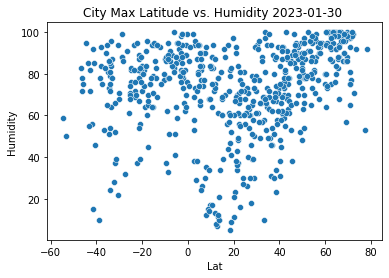

In [16]:
# Build scatter plot for latitude vs. humidity
humidity_plot = sns.scatterplot(data=city_data_df, x='Lat', y='Humidity')
#latplot = plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Humidity {year} ')
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

Create a scatter plot to showcase the relationship between Latitude Vs. Cloudiness


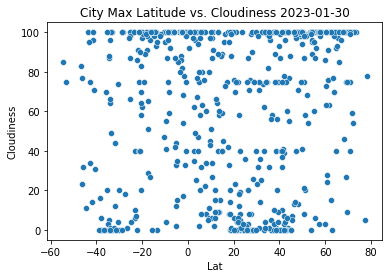

In [17]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_plot = sns.scatterplot(data=city_data_df, x='Lat', y='Cloudiness')
#latplot = plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Cloudiness {year}')
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


Create a scatter plot to showcase the relationship between Latitude vs. Wind Speed Plot

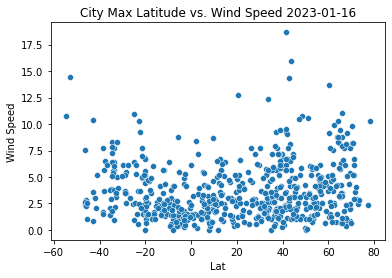

In [22]:
wind_speed_plot = sns.scatterplot(data=city_data_df, x='Lat', y='Wind Speed')
#latplot = plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Wind Speed {year}')
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
#linear regression on all datapoints

# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
slope, intercept, r, p, se = linregress(x_values, y_values)
#print(slope,intercept, r, p, se )

regress_values = x_values * slope + intercept
#print(regress_values)

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query('Lat >= 0')

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
1        nago  26.5881  127.9761      9.24        63           0        0.97   
2      barrow  71.2906 -156.7887    -20.99        77         100       10.80   
4   abu dhabi  24.4667   54.3667     18.06        81           0        1.54   
6     farnham  51.2143   -0.7959      4.71        78          20        2.57   
10   hamilton  39.1834  -84.5333      0.80        93          75        5.14   

   Country        Date  
1       JP  1675109136  
2       US  1675109278  
4       AE  1675109212  
6       GB  1675109280  
10      US  1675109090

In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query('Lat <= 0')

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          touros  -5.1989  -35.4608     28.04        64          44   
3          faanui -16.4833 -151.7500     27.12        75          96   
5         rikitea -23.1203 -134.9692     25.98        72           6   
7        souillac -20.5167   57.5167     25.89        82          83   
8  ambatondrazaka -17.8333   48.4167     20.90        96          98   

   Wind Speed Country        Date  
0        7.03      BR  1675109277  
3        6.48      PF  1675109278  
5        3.66      PF  1675109279  
7        0.43      MU  1675109280  
8        1.59      MG  1675109280

###  Temperature vs. Latitude Linear Regression Plot 


RESEARCH: "Linear regression identifies the equation that produces the smallest difference between all the observed values and their fitted values. To be precise, linear regression finds the smallest sum of squared residuals that is possible for the dataset." (statisticsbyjim.com,"How To Interpret R-squared in Regression Analysis)

"Correlation is not causation."

"The line doesn’t perfectly flow through each of the points and that there is a “residual” between the point and the line (shown as a blue line). The residual standard error tells us the average amount that the actual values of Y (the dots) differ from the predictions (the line) in units of Y. In general, we want the smallest residual standard error possible, because that means our model’s prediction line is very close to the actual values, on average." (Toward Data Science, "Understanding Linear Regression Output in R")

When r = 1, it means that an increase in one variable will lead to a proportional increase in the second variable. 
When r = 0, it means the two variables are not correlated and share no relationship. 
When r = -1, then the two variables are inversely related. So when one of them increases, the other will decrease proportionally. 



In [21]:
def lnregression(location, x,y, x_,y_, x_label,y_label,label,year):
    '''This function will calculate the linear regression and the plot.'''
    
    # Linear regression on Northern Hemisphere
    x_values = x
    y_values= y
    slope, intercept, r, p, se = linregress(x_values, y_values)
    #print(slope,intercept, r, p, se )

    regress_values = x_values * slope + intercept
    #print(regress_values)
    line_eq = f'y = {str(round(slope,2))} x + {str(round(intercept,2))}'

    #return line_eq
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(x_,y_),fontsize=15,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{location} City Max Latitude vs. {label} {year} ')
    plt.show()
    print(f'The r-value is: {r}.')
    print(f'The rsquared-value is: {round((r*r)*100)}%.')

### Linear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude

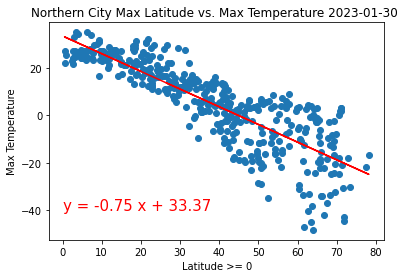

The r-value is: -0.8452098733755047.
The rsquared-value is: 71%.


In [23]:
#plot
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
x_label = 'Latitude >= 0'
y_label = 'Max Temperature'

#these are the coordinates for the annotation of the line
x_ = 0 
y_ = -40
lnregression("Northern", x, y, x_, y_, x_label, y_label,"Max Temperature",year)



### Linear regression scatter plot for Southern Hemisphere: Temperature (C) vs. Latitude

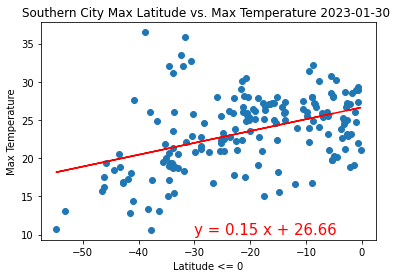

The r-value is: 0.43487451139580735.
The rsquared-value is: 19%.


In [24]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
x_label = 'Latitude <= 0'
y_label = 'Max Temperature'
x_ = -30
y_ = 10
lnregression("Southern", x, y, x_, y_, x_label, y_label,"Max Temperature",year)


### Reverse plot >>>> take the absolute value of the latitude to be able to compare regression lines.

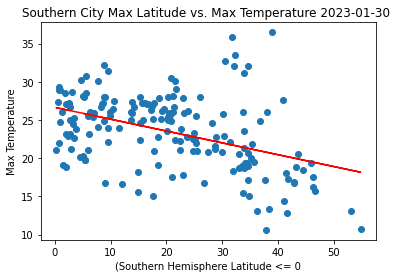

The r-value is: -0.43487451139580735.
The rsquared-value is: 19%.


In [29]:
#Use absolute Value of Latitude to compare correlations.

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
x_label = '(Southern Hemisphere Latitude <= 0'
y_label = 'Max Temperature'
x_ = -30
y_ = 10

xabs = (x).abs()
lnregression("Southern", xabs, y, x_, y_, x_label, y_label,"Max Temperature",year)


### Linear regression scatter plot for Northern Hemisphere: Humidity (%) vs. Latitude

**Discussion about the linear relationship of Latitude and Temperature:**  

Looking at the two charts, one can determine the reason for the differences in correlation. However prediction of the value of the Max Temperature based on the Latitude of the Northern and Southern hemisphere is not explicitly clear in the southern hemisphere data. 

There is a correlation between the linear regression dependent on the season. In the Northern hemisphere in the winter months one can predict from the the linear regression.

As seen in the northern_hemisphere the scatter plot has a tighter grouping of dots around the regression line and a higher r-squared value. It has a medium rsquared value. The r value is negative and close to -1 which means that the two variables are inversely related.

Whereas the southern hemisphere the dots are more spread out and the dots are not located on the line. The r value is positive and closer to 0 which means that the two variables are loosely related.



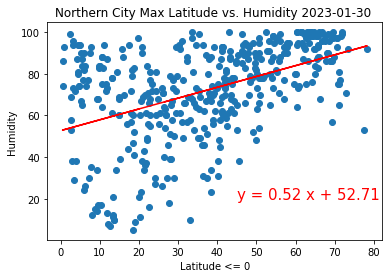

The r-value is: 0.4636040091699953.
The rsquared-value is: 21%.


In [30]:
#Northern Hemisphere and Humidity
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
x_label = 'Latitude <= 0'
y_label = 'Humidity'
x_ = 45
y_ = 20
lnregression("Northern", x, y, x_, y_, x_label, y_label,"Humidity",year)



### Linear regression scatter plot for Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression Plot


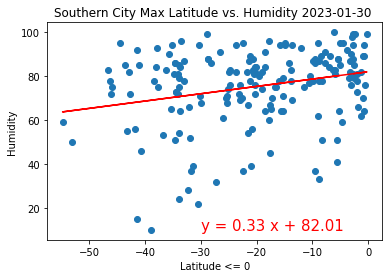

The r-value is: 0.25705523712865336.
The rsquared-value is: 7%.


In [41]:
#Southern Hemisphere and Humidity

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
x_label = 'Latitude <= 0'
y_label = 'Humidity'
x_ = -30
y_ = 10
lnregression("Southern", x, y, x_, y_, x_label, y_label,"Humidity",year)


### Reverse plot >>>> take the absolute value of the latitude to be able to compare regression lines.

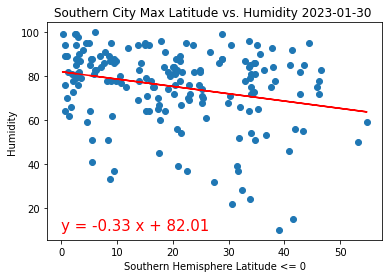

The r-value is: -0.25705523712865336.
The rsquared-value is: 7%.


In [42]:
#Use absolute Value of Latitude to compare correlations.

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
x_label = 'Southern Hemisphere Latitude <= 0'
y_label = 'Humidity'
x_ = 0
y_ = 10

xabs = (x).abs()
lnregression("Southern", xabs, y, x_, y_, x_label, y_label,"Humidity",year)


**Discussion about the linear relationship of Latitude and Humidity:** 

In these two graphs, the Northern hemisphere scatter plot still has a tighter grouping of dots around the regression line and a higher r-squared value than the southern hemisphere. However, both relationship models have a low rsquared value and weak correlation. However, the northern hemisphere has a higher r-value than the southern hemisphere.

Both plots show a r-value thaqt is positive and less than .50 which means that the two variables are loosely related.

### Linear regression scatter plot for Northern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot

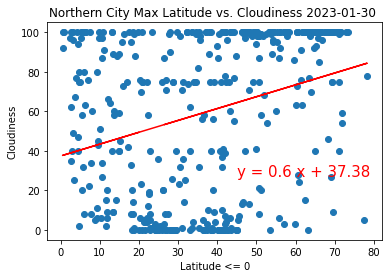

The r-value is: 0.30182225882005304.
The rsquared-value is: 9%.


In [43]:
# Northern Hemisphere and Cloudiness
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
x_label = 'Latitude <= 0'
y_label = 'Cloudiness'
x_ = 45
y_ = 27
lnregression("Northern", x, y, x_, y_, x_label, y_label,"Cloudiness",year)


### Linear regression scatter plot for Southern Hemisphere: Cloudiness and Latitude

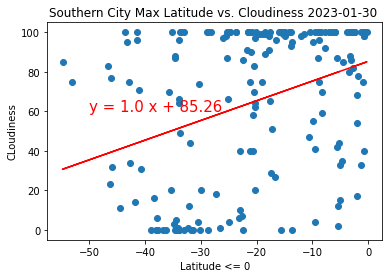

The r-value is: 0.34994411259674046.
The rsquared-value is: 12%.


In [44]:
#Southern Hemisphere and Cloudiness
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
x_label = 'Latitude <= 0'
y_label = 'CLoudiness'
x_ = -50
y_ = 60
lnregression("Southern", x, y, x_, y_, x_label, y_label,"Cloudiness",year)


### Reverse plot >>>> take the absolute value of the latitude to be able to compare regression lines.

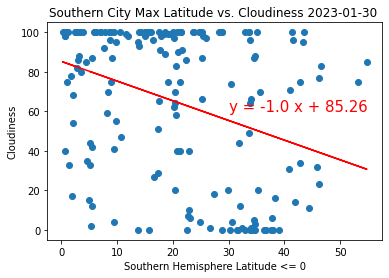

The r-value is: -0.34994411259674046.
The rsquared-value is: 12%.


In [45]:
#Use absolute Value of Latitude to compare correlations.

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
x_label = 'Southern Hemisphere Latitude <= 0'
y_label = 'Cloudiness'
x_ = 30
y_ = 60

xabs = (x).abs()
lnregression("Southern", xabs, y, x_, y_, x_label, y_label,"Cloudiness",year)


**Discussion about the linear relationship of Latitude and Cloudiness:** 

In these two graphs, the Southern hemisphere scatter plot has a tighter grouping of dots around the regression line and a higher r-squared value than the northern hemisphere. However, both relationship models have a low rsquared value and weak correlation. However, the northern hemisphere has a higher r-value than the southern hemisphere.

Both plots show a r-value thaqt is positive and less than .50 which means that the two variables are loosely related.

### Linear regression scatter plot for Northern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot

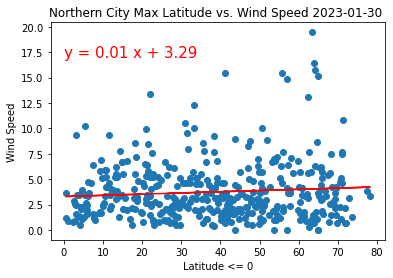

The r-value is: 0.08417698920774327.
The rsquared-value is: 1%.


In [36]:
# Northern Hemisphere and Wind Speed
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
x_label = 'Latitude <= 0'
y_label = 'Wind Speed'
x_ = 0
y_ = 17
lnregression("Northern", x, y, x_, y_, x_label, y_label,"Wind Speed",year)


### Linear regression scatter plot for Southern Hemisphere: Wind Speed and Latitude

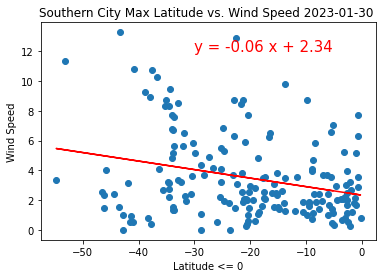

The r-value is: -0.27841337085023404.
The rsquared-value is: 8%.


In [46]:
#Southern Hemisphere and Wind Speed
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
x_label = 'Latitude <= 0'
y_label = 'Wind Speed'
x_ = -30
y_ = 12
lnregression("Southern", x, y, x_, y_, x_label, y_label,"Wind Speed",year)


### Reverse plot >>>> take the absolute value of the latitude to be able to compare regression lines.


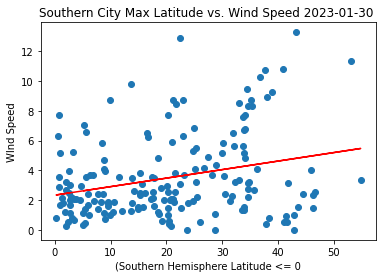

The r-value is: 0.27841337085023404.
The rsquared-value is: 8%.


In [39]:
#Use absolute Value of Latitude to compare correlations.

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
x_label = '(Southern Hemisphere Latitude <= 0'
y_label = 'WInd Speed'
x_ = -30
y_ = 10

xabs = (x).abs()
lnregression("Southern", xabs, y, x_, y_, x_label, y_label,"Wind Speed",year)


**Discussion about the linear relationship of Wind Speed and Latitude:** 

In these two graphs, the Southern hemisphere scatter plot has a tighter grouping of dots around the regression line and a higher r-squared value than the northern hemisphere. However, both relationship models have a low rsquared value and weak correlation. However, the northern hemisphere has a higher r-value than the southern hemisphere.

Both plots show a r-value thaqt is positive and less than .50 which means that the two variables are loosely related.


#Not complete.

In [40]:
#Bonus Info
# Setting the URL as an fstring in loop.
#url = f'https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}''
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

# Define an empty list to fetch the weather data for each city
bonus_city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric')
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        #time.sleep(1)
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        bonus_city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        print(city_url)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | nago
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | abu dhabi
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | scottsburgh
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=scottsburgh&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 9 of Set 1 | farnham
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | ambatondrazaka
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=attawapiskat&appid=a626b7a56ba247111d8206a91e0681fd&

Processing Record 16 of Set 4 | qaqortoq
Processing Record 17 of Set 4 | hervey bay
Processing Record 18 of Set 4 | port blair
Processing Record 19 of Set 4 | avarua
Processing Record 20 of Set 4 | torbay
Processing Record 21 of Set 4 | ruatoria
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=ruatoria&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 22 of Set 4 | hobart
Processing Record 23 of Set 4 | volklingen
Processing Record 24 of Set 4 | grand river south east
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=grand river south east&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 25 of Set 4 | porto novo
Processing Record 26 of Set 4 | kyabram
Processing Record 27 of Set 4 | hilo
Processing Record 28 of Set 4 | pesqueira
Processing Record 29 of Set 4 | chernyshevskiy
Processing Record 30 of Set 4 | gondanglegi
Processing Record 31 of Set 4 | datong
Processing Record 32 of Set 4 | b

Processing Record 15 of Set 7 | saldanha
Processing Record 16 of Set 7 | skagastrond
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=skagastrond&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 17 of Set 7 | prado
Processing Record 18 of Set 7 | yaan
Processing Record 19 of Set 7 | gayeri
Processing Record 20 of Set 7 | samalaeulu
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=samalaeulu&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 21 of Set 7 | ballina
Processing Record 22 of Set 7 | pareora
Processing Record 23 of Set 7 | jining
Processing Record 24 of Set 7 | birin
Processing Record 25 of Set 7 | aykhal
Processing Record 26 of Set 7 | vestmannaeyjar
Processing Record 27 of Set 7 | westport
Processing Record 28 of Set 7 | lavrentiya
Processing Record 29 of Set 7 | montemor-o-novo
Processing Record 30 of Set 7 | goderich
Processing Record 31 of Set 7 | pevek
Processing Record 32 

Processing Record 21 of Set 10 | calvinia
Processing Record 22 of Set 10 | vila velha
Processing Record 23 of Set 10 | manta
Processing Record 24 of Set 10 | lodja
Processing Record 25 of Set 10 | kattivakkam
Processing Record 26 of Set 10 | sitka
Processing Record 27 of Set 10 | pandamatenga
Processing Record 28 of Set 10 | amuntai
Processing Record 29 of Set 10 | chapais
Processing Record 30 of Set 10 | mogok
Processing Record 31 of Set 10 | kochi
Processing Record 32 of Set 10 | nizhneyansk
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&appid=a626b7a56ba247111d8206a91e0681fd&units=metric
Processing Record 33 of Set 10 | charters towers
Processing Record 34 of Set 10 | morant bay
Processing Record 35 of Set 10 | huanren
Processing Record 36 of Set 10 | roald
Processing Record 37 of Set 10 | glendive
Processing Record 38 of Set 10 | doka
Processing Record 39 of Set 10 | los llanos de aridane
Processing Record 40 of Set 10 | ulaangom
Processin

Processing Record 35 of Set 13 | urumqi
Processing Record 36 of Set 13 | santa cruz de la palma
Processing Record 37 of Set 13 | truckee
Processing Record 38 of Set 13 | pahrump
Processing Record 39 of Set 13 | auki
Processing Record 40 of Set 13 | kot kapura
Processing Record 41 of Set 13 | aswan
Processing Record 42 of Set 13 | sao jose de ribamar
Processing Record 43 of Set 13 | nicolas bravo
Processing Record 44 of Set 13 | concepcion de buenos aires
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
#Bonus Info
# Convert the cities weather data into a Pandas DataFrame
bonus_city_data_df = pd.DataFrame.from_dict(bonus_city_data)

In [ ]:
bonus_city_data_df.head()